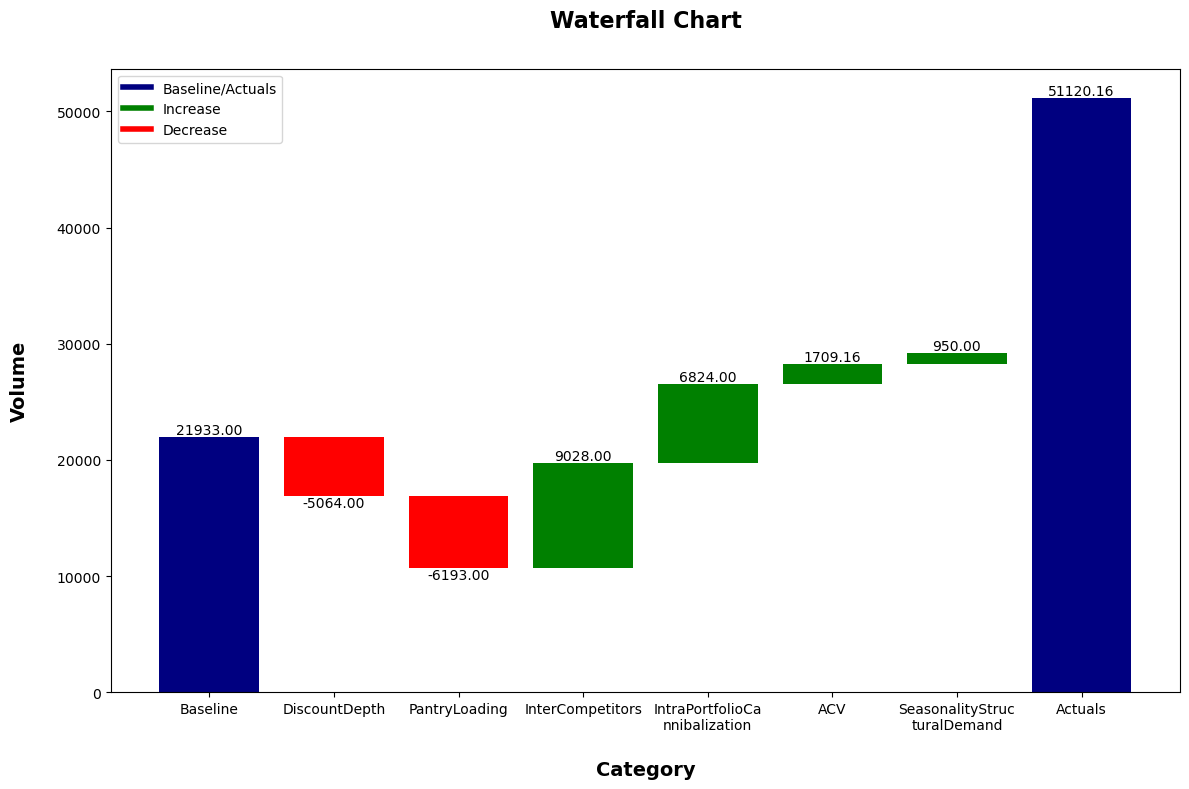

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap

file_path = "C:\\Users\\DURGA BHAVANI\\Downloads\\sales_data.xlsx"
data = pd.read_excel(file_path)

categories = {
    "Baseline": data['Volume'].iloc[0],
    "DiscountDepth": 0,
    "PantryLoading": 0,
    "InterCompetitors": 0,
    "IntraPortfolioCannibalization": 0,
    "ACV": 0,
    "SeasonalityStructuralDemand": 0,
}

baseline = data['Volume'].iloc[0]

for i in range(1, len(data)):
    change = data['Volume'].iloc[i] - baseline
    if data['DiscountDepth'].iloc[i] != "No Discount":
        categories["DiscountDepth"] += change
    elif data['PantryLoadingEffect'].iloc[i] == "Yes":
        categories["PantryLoading"] += change
    elif data['InterCompetitors'].iloc[i] == "Yes":
        categories["InterCompetitors"] += change
    elif data['IntraPortfolioCannibalization'].iloc[i] == "Yes":
        categories["IntraPortfolioCannibalization"] += change
 
    categories["ACV"] += data['ACV'].iloc[i]
    categories["SeasonalityStructuralDemand"] += data['SeasonalityStructuralDemand'].iloc[i]

    baseline = data['Volume'].iloc[i]

categories_df = pd.DataFrame(list(categories.items()), columns=['Category', 'Volume'])
categories_df['Cumulative'] = categories_df['Volume'].cumsum()
categories_df.loc[1:, 'Cumulative'] += categories_df['Volume'].iloc[0]

fig, ax = plt.subplots(figsize=(12, 8))

start = categories_df['Cumulative'].iloc[0]

baseline_bar = ax.bar(categories_df['Category'][0], categories_df['Cumulative'][0], color='navy', label='Baseline/Actuals')

ax.text(categories_df['Category'][0], categories_df['Cumulative'][0], f'{categories_df["Cumulative"][0]:.2f}', ha='center', va='bottom')

increase_bars = []
decrease_bars = []
for i in range(1, len(categories_df)):
    if categories_df['Volume'][i] > 0:
        color = 'green'
        va = 'bottom'
        position = start + categories_df['Volume'][i]  
        bar = ax.bar(categories_df['Category'][i], categories_df['Volume'][i], bottom=start, color=color)
        increase_bars.append(bar)
    else:
        color = 'red'
        va = 'top'
        position = start  
        bar = ax.bar(categories_df['Category'][i], categories_df['Volume'][i], bottom=start, color=color)
        decrease_bars.append(bar)
    
    ax.text(categories_df['Category'][i], position if color == 'green' else start + categories_df['Volume'][i], 
            f'{categories_df["Volume"][i]:.2f}', ha='center', va=va)
    start += categories_df['Volume'][i]

actuals_bar = ax.bar('Actuals', categories_df['Cumulative'].iloc[-1], color='navy')

ax.text('Actuals', categories_df['Cumulative'].iloc[-1], f'{categories_df["Cumulative"].iloc[-1]:.2f}', ha='center', va='bottom')

ax.set_xlabel('Category', fontsize=14, fontweight='bold', labelpad=20)
ax.set_ylabel('Volume', fontsize=14, fontweight='bold', labelpad=20)
ax.set_title('Waterfall Chart', fontsize=16, fontweight='bold', pad=30)

wrapped_labels = [textwrap.fill(label, 16) for label in categories_df['Category']]
wrapped_labels.append('Actuals')
ax.set_xticks(range(len(wrapped_labels)))
ax.set_xticklabels(wrapped_labels, rotation=0, ha='center')

legend_elements = [plt.Line2D([0], [0], color='navy', lw=4, label='Baseline/Actuals'),
                   plt.Line2D([0], [0], color='green', lw=4, label='Increase'),
                   plt.Line2D([0], [0], color='red', lw=4, label='Decrease')]
ax.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()
